In [1]:
!pip install utils
!pip install -Uqq fastbook

     |████████████████████████████████| 727kB 2.6MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 1.0MB 6.5MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 194kB 18.6MB/s 
     |████████████████████████████████| 40kB 5.0MB/s 
     |████████████████████████████████| 92kB 8.9MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 2.6MB 18.3MB/s 


In [2]:
import fastbook
fastbook.setup_book()

from utils import *
from fastbook import *
from fastai.vision.widgets import *
from fastai.vision.all import *


Mounted at /content/gdrive


In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [4]:
%%bash
cd "/content/gdrive/My Drive"
ls

Android
Colab Notebooks
datasets
Document sans titre.gdoc
mailruevolutionsavefd72b8ca5ebe28a19cdf35154ceeafc3
oiseaux
Python
techno


In [5]:
datasets = Path('../content/gdrive/My Drive/oiseaux')

train_path = datasets/'train'
valid_path = datasets/'valid'
test_path = datasets/'test'


In [6]:
fns = get_image_files(valid_path)

print(len(fns))

1125


In [7]:
birds = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = GrandparentSplitter(train_name='train', valid_name='valid'),
    get_y = parent_label
)

In [8]:
dls = birds.dataloaders(datasets)

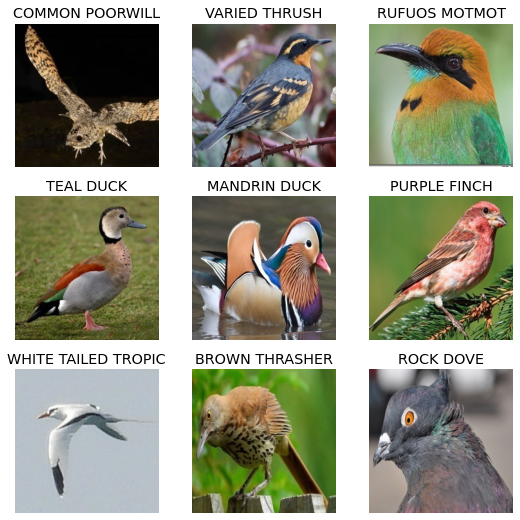

In [9]:
dls.train.show_batch()

In [11]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [12]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.060977,0.309041,0.080000,3:19:23


epoch,train_loss,valid_loss,error_rate,time
0,0.428449,0.088064,0.024889,10:14


In [13]:
interp = ClassificationInterpretation.from_learner(learn)

In [17]:
interp.confusion_matrix()

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0],
       [0, 0, 5, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 5, 0, 0],
       [0, 0, 0, ..., 0, 5, 0],
       [0, 0, 0, ..., 0, 0, 4]])

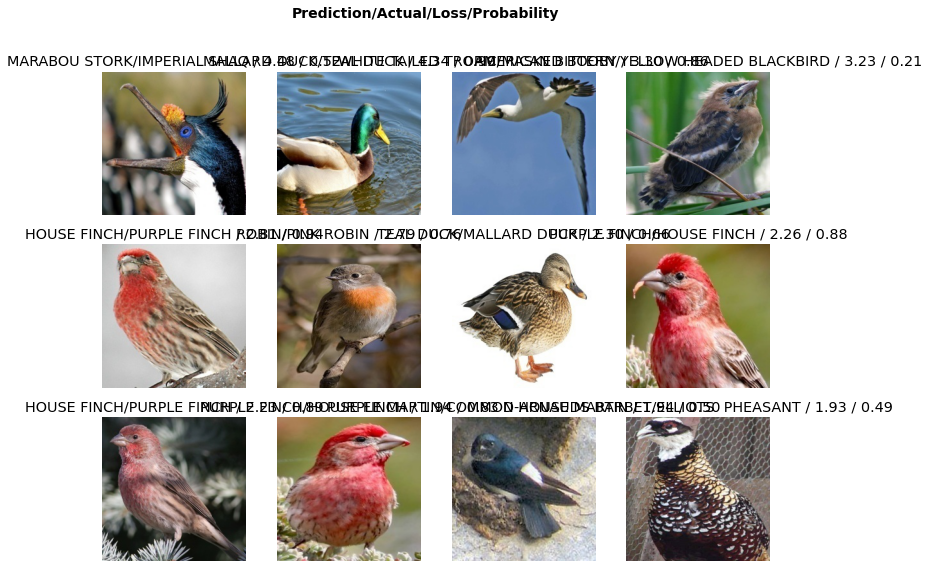

In [15]:
interp.plot_top_losses(12, nrows=3)

In [19]:
learn.path = Path('../content/gdrive/My Drive/')
learn.export("birds_model.pkl")

In [47]:
learn_inference = load_learner("../content/gdrive/My Drive/birds_model.pkl")
img = PILImage.create("../content/gdrive/My Drive/oiseaux/test/BLUE HERON/1.jpg")
pred,pred_idx,probs = learn_inference.predict(img)

In [48]:
pred, pred_idx

('BLUE HERON', tensor(37))

In [49]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: BLUE HERON; Probability: 0.9957')